# ANN

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Load data
import pandas as pd

def load_wine_data():
    csv_path = os.path.join(r"C:\Users\Sam van Pomeren\Desktop\HWUK\F21DL", "wine.csv")
    return pd.read_csv(csv_path)

def score(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true, Y_pred)
    acc_score = accuracy_score(Y_true, Y_pred)
    prec_score = precision_score(Y_true, Y_pred, average=None, zero_division=1)
    rec_score = recall_score(Y_true, Y_pred, average=None, zero_division=1)
    F_score = f1_score(Y_true, Y_pred, average=None, zero_division=1)
    
    
    print(conf_mat)
    print("Accuracy score = ",acc_score)
    print("Precision score = ",prec_score)
    print("Recall score = ",rec_score)
    print("F measure = ",F_score)
    print(" ")

wine = load_wine_data()
wine.describe()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = wine.iloc[:,[1, 10, 2, 9, 6, 7, 5]]  #independent columns
y = wine["quality"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.35, random_state=42)

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, max_iter=10000)
softmax_reg.fit(X_train, y_train)

y_pred_train = softmax_reg.predict(X_train)
y_pred_test = softmax_reg.predict(X_test)

score(y,y)
score(y_train,y_pred_train)
score(y_test,y_pred_test)




[[ 10   0   0   0   0   0]
 [  0  53   0   0   0   0]
 [  0   0 681   0   0   0]
 [  0   0   0 638   0   0]
 [  0   0   0   0 199   0]
 [  0   0   0   0   0  18]]
Accuracy score =  1.0
Precision score =  [1. 1. 1. 1. 1. 1.]
Recall score =  [1. 1. 1. 1. 1. 1.]
F measure =  [1. 1. 1. 1. 1. 1.]
 
[[  0   0   6   0   0   0]
 [  0   0  11   7   0   0]
 [  0   0 178  53   1   0]
 [  0   0  63 158  11   0]
 [  0   0   3  44  21   0]
 [  0   0   0   1   2   0]]
Accuracy score =  0.6386404293381037
Precision score =  [1.         1.         0.68199234 0.60076046 0.6        1.        ]
Recall score =  [0.         0.         0.76724138 0.68103448 0.30882353 0.        ]
F measure =  [0.         0.         0.72210953 0.63838384 0.40776699 0.        ]
 
[[  1   0   2   1   0   0]
 [  0   0  24  11   0   0]
 [  0   0 333 113   3   0]
 [  0   0 156 221  29   0]
 [  0   0   8  92  31   0]
 [  0   0   0   9   6   0]]
Accuracy score =  0.5634615384615385
Precision score =  [1.         1.         0.6367112

In [3]:
cross_val_score(softmax_reg, X_train, y_train, cv=8, scoring='accuracy')

C:\Users\Sam van Pomeren\.conda\envs\F21DL\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"


array([0.58571429, 0.62857143, 0.58571429, 0.58571429, 0.71428571,
       0.71428571, 0.62857143, 0.66666667])

In [4]:
cross_val_score(softmax_reg, X, y, cv=10, scoring='accuracy')

array([0.49375   , 0.6       , 0.575     , 0.5       , 0.5625    ,
       0.7125    , 0.64375   , 0.55625   , 0.61875   , 0.58490566])

In [18]:
from sklearn.neural_network import MLPClassifier

activ = ["identity","logistic","tanh","relu"]
solv = ["lbfgs","sgd","adam"]
lrn_rate = ["constant","invscaling","adaptive"]
lyr_size = [5,20,100,500]
momentum = [0.2,0.5,0.9]
val_frac = [0.1,0.5,0.9]
epochs = [200,500,1000,5000]

mlp_clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=100, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

0.5615384615384615

C:\Users\Sam van Pomeren\.conda\envs\F21DL\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Sam van Pomeren\.conda\envs\F21DL\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


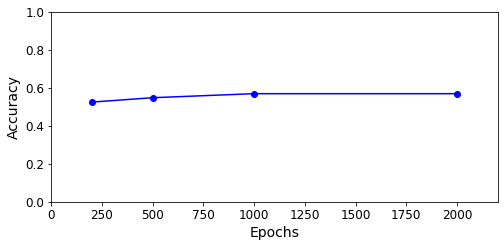

In [19]:
# Epochs
scores = []
for x in epochs:
    mlp_clf = MLPClassifier(random_state=1, max_iter=x, hidden_layer_sizes=20, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(epochs, scores, "bo-")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axis([0,np.amax(epochs)*1.1,0,1])
plt.show()   

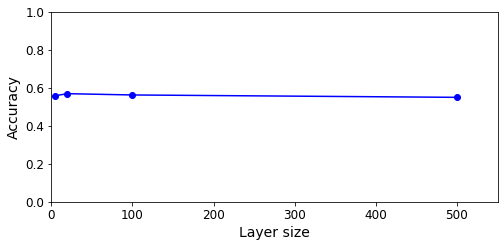

In [6]:
# Layer size
scores1 = []
for x in lyr_size:
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=x, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores1.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(lyr_size, scores1, "bo-")
plt.xlabel("Layer size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axis([0,np.amax(lyr_size)*1.1,0,1])
plt.show()   

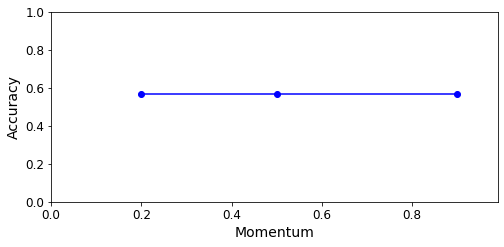

In [7]:
# Momentum
scores2 = []
for x in momentum:
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=20, activation="relu", learning_rate = "constant", momentum=x, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores2.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(momentum, scores2, "bo-")
plt.xlabel("Momentum", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axis([0,np.amax(momentum)*1.1,0,1])
plt.show()   

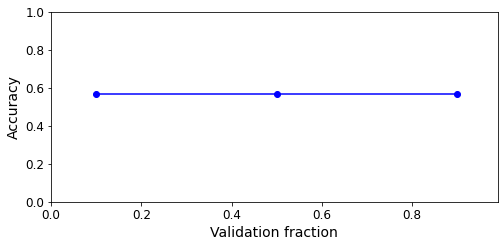

In [8]:
# Validation fraction
scores3 = []
for x in val_frac:
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=20, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=x)
    mlp_clf.fit(X_train, y_train)
    scores3.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(val_frac, scores3, "bo-")
plt.xlabel("Validation fraction", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axis([0,np.amax(val_frac)*1.1,0,1])
plt.show()   

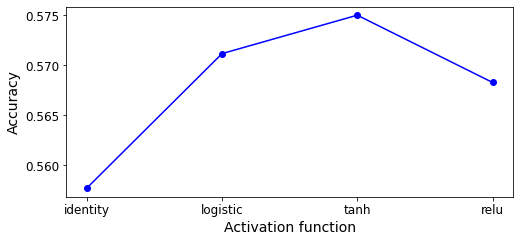

In [9]:
# Activation functions
scores4 = []
for x in activ:
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=20, activation=x, learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores4.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(activ, scores4, "bo-")
plt.xlabel("Activation function", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
#plt.axis([0,np.amax(lyr_size)*1.1,0,1])
plt.show()   

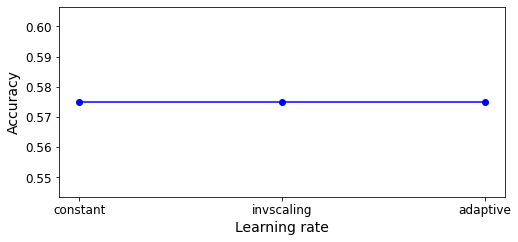

In [10]:
# Activation functions
scores5 = []
for x in lrn_rate:
    mlp_clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=20, activation="tanh", learning_rate = x, momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores5.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(lrn_rate, scores5, "bo-")
plt.xlabel("Learning rate", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
#plt.axis([0,np.amax(lyr_size)*1.1,0,1])
plt.show()   

Learn rate =  constant Layer size =  5


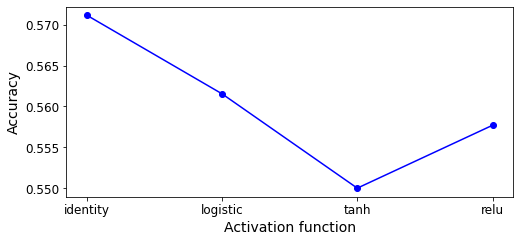

Learn rate =  constant Layer size =  20


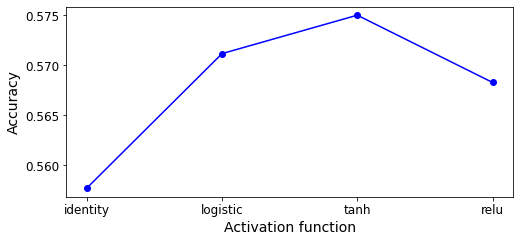

Learn rate =  constant Layer size =  100


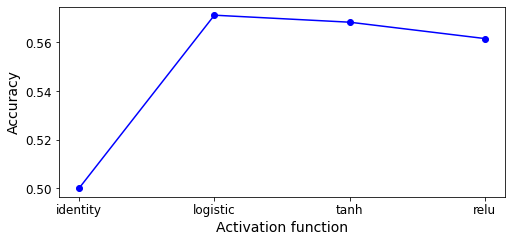

Learn rate =  constant Layer size =  500


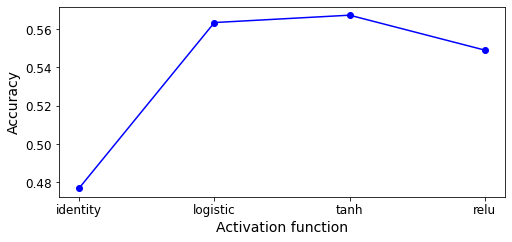

Learn rate =  invscaling Layer size =  5


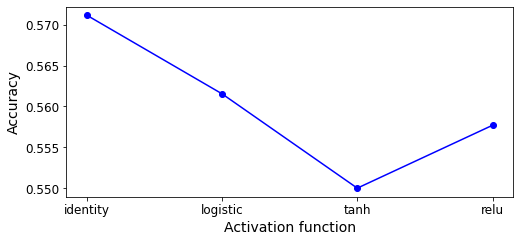

Learn rate =  invscaling Layer size =  20


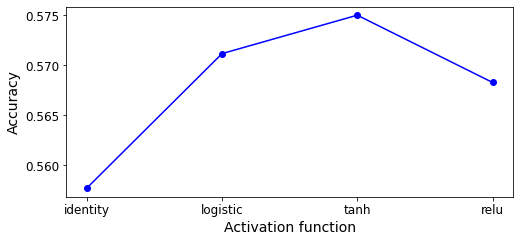

Learn rate =  invscaling Layer size =  100


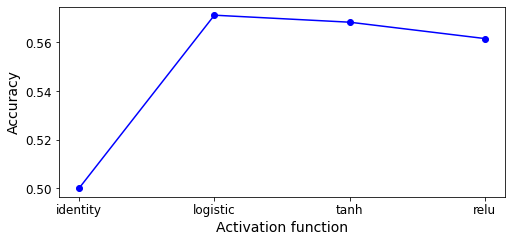

Learn rate =  invscaling Layer size =  500


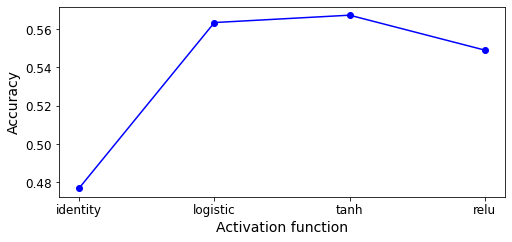

Learn rate =  adaptive Layer size =  5


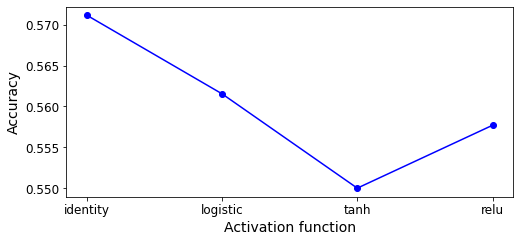

Learn rate =  adaptive Layer size =  20


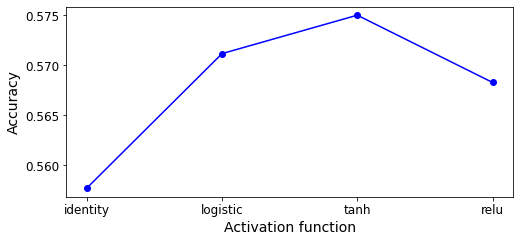

Learn rate =  adaptive Layer size =  100


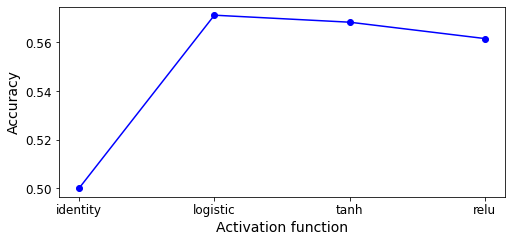

Learn rate =  adaptive Layer size =  500


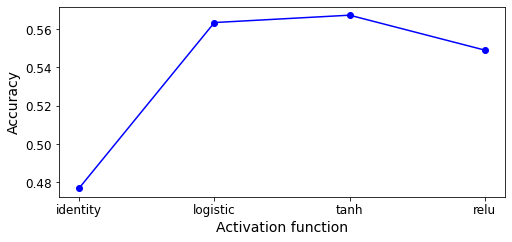

In [11]:

for x in lrn_rate:
    for y in lyr_size:
        scores6 = []
        for z in activ:
            mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=y, activation=z, learning_rate = x, momentum=0.9, validation_fraction=0.1)
            mlp_clf.fit(X_train, y_train)
            scores6.append(mlp_clf.score(X_test, y_test))
            
        print("Learn rate = ", x, "Layer size = ", y)
        plt.figure(figsize=(8, 3.5))
        plt.plot(activ, scores6, "bo-")
        plt.xlabel("Activation function", fontsize=14)
        plt.ylabel("Accuracy", fontsize=14)
        #plt.axis([0,np.amax(lyr_size)*1.1,0,1])
        plt.show() 

## Conclusion ANN

The linear classifier performed "Okay" on new data. A score of 57% on the test data after scoring 60% on the training data. The cross validation on the whole data set did achieve a peak of 71% although I suspect this being an split in which not that many outer classes had to be classified. This is also the main problem that was found in the first train/test. I think this data is not very linearly seperable.

Concluding from the Multilayer Perceptron, not all the parameters caused change to the prediction, the best score was still stuck around 58%/59%. The layer size and the activation function had the most impact on the score. A layer size of around 20 would be best for this data set, achieving the hightest accuracy. This is also the size on which the tanh function works best and becomes the activation function with the highest accuracy.

After these experiments I can conclude this dataset is very complex and hard to train an algorithm to generalize on new data.



# CNN

In [12]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs = 20

activ = ["identity","logistic","tanh","relu"]
solv = ["lbfgs","sgd","adam"]
lrn_rate = ["constant","invscaling","adaptive"]
lyr_size = [5,20,100,500]
momentum = [0.2,0.5,0.9]
val_frac = [0.1,0.5,0.9]

mlp_clf = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=100, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

wine_model = Sequential()
wine_model.add(LeakyReLU(alpha=0.1))
wine_model.add(MaxPooling2D((2, 2),padding='same'))
wine_model.add(LeakyReLU(alpha=0.1))
wine_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
wine_model.add(LeakyReLU(alpha=0.1))                  
wine_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
wine_model.add(Flatten())
wine_model.add(Dense(128, activation='linear'))
wine_model.add(LeakyReLU(alpha=0.1))                  
wine_model.add(Dense(6, activation='softmax'))


C:\Users\Sam van Pomeren\.conda\envs\F21DL\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
wine_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
wine_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train, test_size=0.2, random_state=13)
wine_train = wine_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

#### https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python 
#### https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f

I could only find examples using images so I think this is the furthest this algorithms is going to get with a data set like mine. I did understand most of the layers and many of them are image related. Therefore I will leave the implementation of this algorithm here.